# **Data Science for Health**

## Project Activity - E2 - Exploratory Data Analysis

---

Group Members and RA:

Alessandro Welbi Domingues Junior   263535

Felipe Augusto Oliveira dos Santos  233292

Felipe Marinho Tavares              265680

Thiago Machado da Cunha             231357

---

About the *dataset*:

>The dataset consists in Simon conflict task with cost of conflict reinforcement manipulation where 28 Parkinson patients and 28 matched controls were studied. PD came in twice separated by a week, either ON or OFF medication. CTL only came in once.  The data was collected in 2015 at Cognitive Rhythms and Computation Lab at University of New Mexico.  Patients also had an acceleromter taped to their most tremor affected hand.  X, Y, Z dimensions recorded throughout.


*About EEG Channels*:

>An electrode capturing brainwave activity is called an EEG channel. Typical EEG systems can have as few as a single channel to as many as 256 channels. Electrode placement on the head adheres to a formal standard called the 10/20 system or International 10/20 system. This system uses the distance from the bridge of the nose (the nasion) to the lowest point of the skull from the back of the head (normally indicated by a prominent bump—the inion) as a reference distance for a given person’s head size. The electrodes are then separated from each other either by 10% or 20% of this reference distance 

Out of the total 84 recordings from the dataset, 56 have metadata with information about sex and age.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Importing Participants dataset

In [256]:
commom_path = "https://raw.githubusercontent.com/OptionalLanguor/datasci4health/master/data/external/eeglab_dataset/"
participants_file = "participants.tsv"

url_participants = commom_path + participants_file
participants = pd.read_csv(url_participants, sep="\t")

participants.head()

,participant_id,Original_ID,Group,sess1_Med,sess2_Med,sex,age
0,sub-001,8010,CTL,NaN,no s2,Female,61
1,sub-002,801,PD,ON,OFF,Female,60
2,sub-003,802,PD,OFF,ON,Male,75
3,sub-004,803,PD,OFF,ON,Female,76
4,sub-005,804,PD,ON,OFF,Male,75


## Replacing sex values
Female: 0
Male: 1


In [258]:
participants['sex'] = participants['sex'].replace(['Female'], 0)
participants['sex'] = participants['sex'].replace(['Male'], 1)

participants.head()

,participant_id,Original_ID,Group,sess1_Med,sess2_Med,sex,age
0,sub-001,8010,CTL,NaN,no s2,0,61
1,sub-002,801,PD,ON,OFF,0,60
2,sub-003,802,PD,OFF,ON,1,75
3,sub-004,803,PD,OFF,ON,0,76
4,sub-005,804,PD,ON,OFF,1,75


## Replacing group values
CTL: 0
PD: 1

In [259]:
participants['Group'] = participants['Group'].replace(['CTL'], 0)
participants['Group'] = participants['Group'].replace(['PD'], 1)

participants.head()

,participant_id,Original_ID,Group,sess1_Med,sess2_Med,sex,age
0,sub-001,8010,0,NaN,no s2,0,61
1,sub-002,801,1,ON,OFF,0,60
2,sub-003,802,1,OFF,ON,1,75
3,sub-004,803,1,OFF,ON,0,76
4,sub-005,804,1,ON,OFF,1,75


# Replacing sessions information data:

*   OFF   (No medication) -> 0 
*   ON    (W/ medication) -> 1
*   NaN   (No apply)      -> 9
*   no s1 (No session 1)  -> 99
*   no s2 (No session 2)  -> 99


In [260]:
participants['sess1_Med'] = participants['sess1_Med'].replace(['OFF'], 0)
participants['sess2_Med'] = participants['sess2_Med'].replace(['OFF'], 0)

participants['sess1_Med'] = participants['sess1_Med'].replace(['ON'], 1)
participants['sess2_Med'] = participants['sess2_Med'].replace(['ON'], 1)

participants['sess1_Med'] = participants['sess1_Med'].fillna(9)
participants['sess2_Med'] = participants['sess2_Med'].fillna(9)

participants['sess1_Med'] = participants['sess1_Med'].replace(['no s1'], 99)
participants['sess2_Med'] = participants['sess2_Med'].replace(['no s2'], 99)

participants.head()

,participant_id,Original_ID,Group,sess1_Med,sess2_Med,sex,age
0,sub-001,8010,0,9.0,99,0,61
1,sub-002,801,1,1.0,0,0,60
2,sub-003,802,1,0.0,1,1,75
3,sub-004,803,1,0.0,1,0,76
4,sub-005,804,1,1.0,0,1,75


# Blank dataframe for bandpower dataset

In [246]:
bp_dataset = {"abs_bp_delta_Cz_s01":[], "abs_bp_tetha_Cz_s01":[], "abs_bp_alpha_Cz_s01":[], "abs_bp_beta_Cz_s01":[], "abs_bp_gama_Cz_s01":[], "abs_bp_delta_Cz_s02":[], "abs_bp_tetha_Cz_s02":[], "abs_bp_alpha_Cz_s02":[], "abs_bp_beta_Cz_s02":[], "abs_bp_gama_Cz_s02":[],}

# Import band power dataset

In [271]:
band_power_path = "https://raw.githubusercontent.com/OptionalLanguor/datasci4health/dev/data/bandpower/Cz_Fz_Pz_Oz_bandPowers.csv"
df_bp = pd.read_csv(band_power_path)

df_bp[["absolute_bp", "relative_bp"]] = df_bp[["absolute_bp", "relative_bp"]].apply(pd.to_numeric)


In [272]:
bp_dataset = {"abs_bp_delta_Cz_s01":[], "abs_bp_tetha_Cz_s01":[], "abs_bp_alpha_Cz_s01":[], "abs_bp_beta_Cz_s01":[], "abs_bp_gama_Cz_s01":[], "abs_bp_delta_Cz_s02":[], "abs_bp_tetha_Cz_s02":[], "abs_bp_alpha_Cz_s02":[], "abs_bp_beta_Cz_s02":[], "abs_bp_gama_Cz_s02":[],}

# Extracting Absolute Band Power from channel Cz into new Dataset

In [273]:
channels = ["delta", "tetha", "alpha", "beta", "gama"]
eletrode = "Cz"
channels_count = 0
participants_count = 1

while channels_count < len(channels):
  col = "abs_bp_" + channels[channels_count] + "_" + eletrode + "_s01"
  # print(col)
  temp_df = df_bp[(df_bp["freq_act"] == channels[channels_count]) & (df_bp["sub"] == participants_count) & (df_bp["ses"] == 1) & (df_bp["channel"] == "Cz")]
  
  if len(temp_df['absolute_bp'].values) == 1:
    bp_dataset[col].append(temp_df["absolute_bp"].values[0])

  col = "abs_bp_" + channels[channels_count] + "_" + eletrode + "_s02"
  try:
    if len(temp_df['absolute_bp'].values) == 1:
      temp_df = df_bp[(df_bp["freq_act"] == channels[channels_count]) & (df_bp["sub"] == participants_count) & (df_bp["ses"] == 2) & (df_bp["channel"] == "Cz")]

      bp_dataset[col].append(temp_df["absolute_bp"].values[0])

  except:
    bp_dataset[col].append(0.0)

  participants_count += 1

  if participants_count > 56:
    participants_count = 0
    channels_count += 1


df_abs_bp = pd.DataFrame(data=bp_dataset)
df_abs_bp.head()

,abs_bp_delta_Cz_s01,abs_bp_tetha_Cz_s01,abs_bp_alpha_Cz_s01,abs_bp_beta_Cz_s01,abs_bp_gama_Cz_s01,abs_bp_delta_Cz_s02,abs_bp_tetha_Cz_s02,abs_bp_alpha_Cz_s02,abs_bp_beta_Cz_s02,abs_bp_gama_Cz_s02
0,7.482034,1.626394,0.999210,1.867909,1.966724,0.000000,0.000000,0.000000,0.000000,0.000000
1,8.416555,0.965854,0.608626,0.644891,1.414223,2.812140,0.558671,0.411411,0.542121,0.701214
2,22.694244,8.198214,4.478288,5.350492,4.680256,11.598456,7.757655,4.200623,4.093037,2.542612
3,0.043266,0.030379,0.028278,0.082001,0.438553,10.759656,2.653185,1.995567,2.893754,2.727181
4,3.823136,0.630612,0.297879,0.464629,1.287740,7.021244,1.046744,0.411496,0.483105,1.481388


## Merge datasets Participants com Absolut band Power

In [274]:
result = pd.concat([participants, df_abs_bp], axis=1)

result = result.drop(['Original_ID'], axis=1)
result.head()

,participant_id,Group,sess1_Med,sess2_Med,sex,age,abs_bp_delta_Cz_s01,abs_bp_tetha_Cz_s01,abs_bp_alpha_Cz_s01,abs_bp_beta_Cz_s01,abs_bp_gama_Cz_s01,abs_bp_delta_Cz_s02,abs_bp_tetha_Cz_s02,abs_bp_alpha_Cz_s02,abs_bp_beta_Cz_s02,abs_bp_gama_Cz_s02
0,sub-001,0,9.0,99,0,61,7.482034,1.626394,0.999210,1.867909,1.966724,0.000000,0.000000,0.000000,0.000000,0.000000
1,sub-002,1,1.0,0,0,60,8.416555,0.965854,0.608626,0.644891,1.414223,2.812140,0.558671,0.411411,0.542121,0.701214
2,sub-003,1,0.0,1,1,75,22.694244,8.198214,4.478288,5.350492,4.680256,11.598456,7.757655,4.200623,4.093037,2.542612
3,sub-004,1,0.0,1,0,76,0.043266,0.030379,0.028278,0.082001,0.438553,10.759656,2.653185,1.995567,2.893754,2.727181
4,sub-005,1,1.0,0,1,75,3.823136,0.630612,0.297879,0.464629,1.287740,7.021244,1.046744,0.411496,0.483105,1.481388


## Correlation Matrix

In [275]:
result.corr()

,Group,sess1_Med,sess2_Med,sex,age,abs_bp_delta_Cz_s01,abs_bp_tetha_Cz_s01,abs_bp_alpha_Cz_s01,abs_bp_beta_Cz_s01,abs_bp_gama_Cz_s01,abs_bp_delta_Cz_s02,abs_bp_tetha_Cz_s02,abs_bp_alpha_Cz_s02,abs_bp_beta_Cz_s02,abs_bp_gama_Cz_s02
Group,1.000000e+00,-0.996558,-0.999974,-8.118755e-18,0.030575,-0.132923,-0.115780,-0.033214,0.095752,0.126809,0.134842,0.134846,0.134859,0.134891,0.134898
sess1_Med,-9.965576e-01,1.000000,0.995937,1.286038e-02,-0.045525,0.132817,0.117920,0.042725,-0.079940,-0.110934,-0.150187,-0.150190,-0.150203,-0.150234,-0.150242
sess2_Med,-9.999742e-01,0.995937,1.000000,-1.113584e-03,-0.029270,0.132889,0.115558,0.032380,-0.097091,-0.128142,-0.133470,-0.133473,-0.133487,-0.133519,-0.133526
sex,-8.118755e-18,0.012860,-0.001114,1.000000e+00,0.273818,0.105356,0.084574,-0.005295,-0.133443,-0.156193,0.108466,0.108467,0.108473,0.108482,0.108460
age,3.057489e-02,-0.045525,-0.029270,2.738180e-01,1.000000,-0.005625,0.006019,0.040114,0.069612,0.069913,0.131102,0.131102,0.131102,0.131107,0.131115
abs_bp_delta_Cz_s01,-1.329226e-01,0.132817,0.132889,1.053558e-01,-0.005625,1.000000,0.989326,0.803050,0.220780,0.060006,-0.018829,-0.018830,-0.018831,-0.018835,-0.018835
abs_bp_tetha_Cz_s01,-1.157805e-01,0.117920,0.115558,8.457421e-02,0.006019,0.989326,1.000000,0.880716,0.358319,0.201633,-0.021937,-0.021938,-0.021939,-0.021942,-0.021934
abs_bp_alpha_Cz_s01,-3.321441e-02,0.042725,0.032380,-5.295451e-03,0.040114,0.803050,0.880716,1.000000,0.757440,0.640393,-0.027696,-0.027697,-0.027697,-0.027692,-0.027662
abs_bp_beta_Cz_s01,9.575248e-02,-0.079940,-0.097091,-1.334425e-01,0.069612,0.220780,0.358319,0.757440,1.000000,0.986074,-0.023194,-0.023194,-0.023193,-0.023181,-0.023131
abs_bp_gama_Cz_s01,1.268087e-01,-0.110934,-0.128142,-1.561929e-01,0.069913,0.060006,0.201633,0.640393,0.986074,1.000000,-0.020118,-0.020118,-0.020117,-0.020104,-0.020052


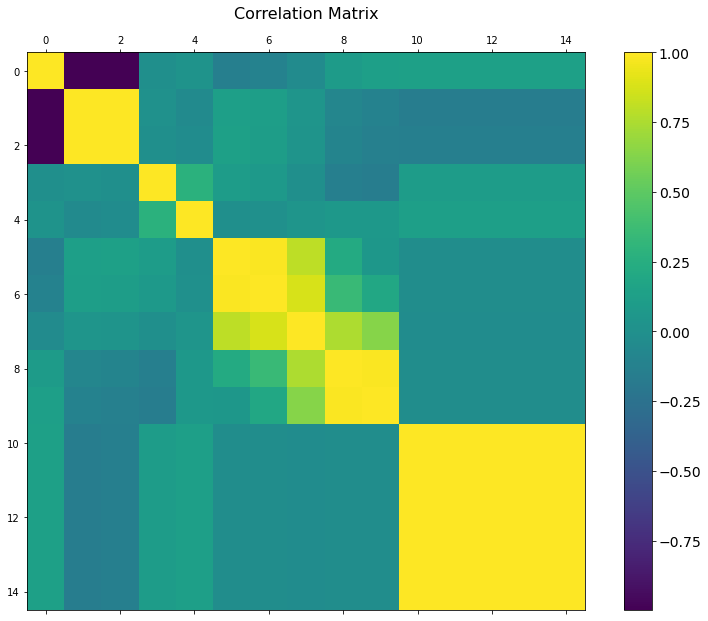

In [276]:
f = plt.figure(figsize=(14, 10))
plt.matshow(result.corr(), fignum=f.number)

cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);
plt.show()

## Correlation matrix for parkinson participants

In [277]:
 result = result[result["Group"] == 1]
 result.head()

,participant_id,Group,sess1_Med,sess2_Med,sex,age,abs_bp_delta_Cz_s01,abs_bp_tetha_Cz_s01,abs_bp_alpha_Cz_s01,abs_bp_beta_Cz_s01,abs_bp_gama_Cz_s01,abs_bp_delta_Cz_s02,abs_bp_tetha_Cz_s02,abs_bp_alpha_Cz_s02,abs_bp_beta_Cz_s02,abs_bp_gama_Cz_s02
1,sub-002,1,1.0,0,0,60,8.416555,0.965854,0.608626,0.644891,1.414223,2.812140,0.558671,0.411411,0.542121,0.701214
2,sub-003,1,0.0,1,1,75,22.694244,8.198214,4.478288,5.350492,4.680256,11.598456,7.757655,4.200623,4.093037,2.542612
3,sub-004,1,0.0,1,0,76,0.043266,0.030379,0.028278,0.082001,0.438553,10.759656,2.653185,1.995567,2.893754,2.727181
4,sub-005,1,1.0,0,1,75,3.823136,0.630612,0.297879,0.464629,1.287740,7.021244,1.046744,0.411496,0.483105,1.481388
5,sub-006,1,1.0,0,1,79,13.843880,1.602052,1.535247,3.605722,1.355070,5.002690,1.095306,1.166728,2.655974,1.505212


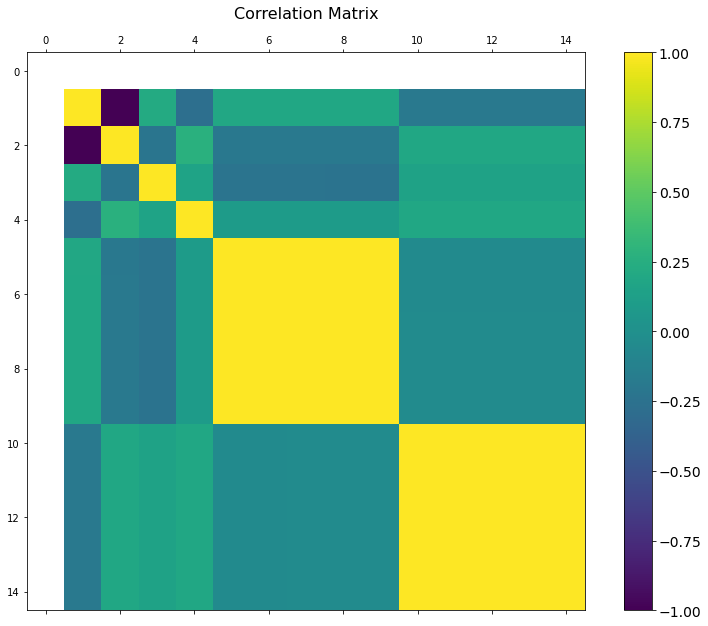

In [278]:
f = plt.figure(figsize=(14, 10))
plt.matshow(result.corr(), fignum=f.number)

cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);
plt.show()

# Extracting Relative Band Power from channel Cz into new Dataset

In [279]:
rel_bp_dataset = {"rel_bp_delta_Cz_s01":[], "rel_bp_tetha_Cz_s01":[], "rel_bp_alpha_Cz_s01":[], "rel_bp_beta_Cz_s01":[], "rel_bp_gama_Cz_s01":[], "rel_bp_delta_Cz_s02":[], "rel_bp_tetha_Cz_s02":[], "rel_bp_alpha_Cz_s02":[], "rel_bp_beta_Cz_s02":[], "rel_bp_gama_Cz_s02":[],}

In [280]:
channels = ["delta", "tetha", "alpha", "beta", "gama"]
eletrode = "Cz"
channels_count = 0
participants_count = 1

while channels_count < len(channels):
  col = "rel_bp_" + channels[channels_count] + "_" + eletrode + "_s01"
  # print(col)
  temp_df = df_bp[(df_bp["freq_act"] == channels[channels_count]) & (df_bp["sub"] == participants_count) & (df_bp["ses"] == 1) & (df_bp["channel"] == "Cz")]
  
  if len(temp_df['relative_bp'].values) == 1:
    rel_bp_dataset[col].append(temp_df["relative_bp"].values[0])

  col = "rel_bp_" + channels[channels_count] + "_" + eletrode + "_s02"
  try:
    if len(temp_df['relative_bp'].values) == 1:
      temp_df = df_bp[(df_bp["freq_act"] == channels[channels_count]) & (df_bp["sub"] == participants_count) & (df_bp["ses"] == 2) & (df_bp["channel"] == "Cz")]

      rel_bp_dataset[col].append(temp_df["relative_bp"].values[0])

  except:
    rel_bp_dataset[col].append(0.0)

  participants_count += 1

  if participants_count > 56:
    participants_count = 0
    channels_count += 1


df_rel_bp = pd.DataFrame(data=rel_bp_dataset)
df_rel_bp.head()

,rel_bp_delta_Cz_s01,rel_bp_tetha_Cz_s01,rel_bp_alpha_Cz_s01,rel_bp_beta_Cz_s01,rel_bp_gama_Cz_s01,rel_bp_delta_Cz_s02,rel_bp_tetha_Cz_s02,rel_bp_alpha_Cz_s02,rel_bp_beta_Cz_s02,rel_bp_gama_Cz_s02
0,0.245037,0.138530,0.104332,0.229690,0.314962,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.412203,0.115601,0.101370,0.126992,0.384096,0.293444,0.134775,0.122901,0.183026,0.322062
2,0.162433,0.246097,0.158077,0.221605,0.321814,0.214383,0.316879,0.193108,0.210131,0.240782
3,0.036183,0.028513,0.026589,0.079157,0.445105,0.313359,0.155954,0.145428,0.238119,0.323778
4,0.275236,0.116899,0.068510,0.127009,0.442642,0.298485,0.136728,0.070761,0.106484,0.448128


## Merge dos DFs Participants e Relative BP

In [281]:
result = pd.concat([participants, df_rel_bp], axis=1)

result = result.drop(['Original_ID'], axis=1)
result.head()

,participant_id,Group,sess1_Med,sess2_Med,sex,age,rel_bp_delta_Cz_s01,rel_bp_tetha_Cz_s01,rel_bp_alpha_Cz_s01,rel_bp_beta_Cz_s01,rel_bp_gama_Cz_s01,rel_bp_delta_Cz_s02,rel_bp_tetha_Cz_s02,rel_bp_alpha_Cz_s02,rel_bp_beta_Cz_s02,rel_bp_gama_Cz_s02
0,sub-001,0,9.0,99,0,61,0.245037,0.138530,0.104332,0.229690,0.314962,0.000000,0.000000,0.000000,0.000000,0.000000
1,sub-002,1,1.0,0,0,60,0.412203,0.115601,0.101370,0.126992,0.384096,0.293444,0.134775,0.122901,0.183026,0.322062
2,sub-003,1,0.0,1,1,75,0.162433,0.246097,0.158077,0.221605,0.321814,0.214383,0.316879,0.193108,0.210131,0.240782
3,sub-004,1,0.0,1,0,76,0.036183,0.028513,0.026589,0.079157,0.445105,0.313359,0.155954,0.145428,0.238119,0.323778
4,sub-005,1,1.0,0,1,75,0.275236,0.116899,0.068510,0.127009,0.442642,0.298485,0.136728,0.070761,0.106484,0.448128


## Correlation matrix

In [263]:
result.corr()

,Group,sess1_Med,sess2_Med,sex,age,rel_bp_delta_Cz_s01,rel_bp_tetha_Cz_s01,rel_bp_alpha_Cz_s01,rel_bp_beta_Cz_s01,rel_bp_gama_Cz_s01,rel_bp_delta_Cz_s02,rel_bp_tetha_Cz_s02,rel_bp_alpha_Cz_s02,rel_bp_beta_Cz_s02,rel_bp_gama_Cz_s02
Group,1.000000e+00,-0.996558,-0.999974,-8.118755e-18,0.030575,-0.204392,0.128370,0.306734,-0.032140,0.001674,0.875322,0.840059,0.843284,0.887761,0.844079
sess1_Med,-9.965576e-01,1.000000,0.995937,1.286038e-02,-0.045525,0.223183,-0.132646,-0.292489,0.059406,-0.022418,-0.866851,-0.837288,-0.832207,-0.871113,-0.850521
sess2_Med,-9.999742e-01,0.995937,1.000000,-1.113584e-03,-0.029270,0.202699,-0.127958,-0.307869,0.029768,0.000123,-0.875772,-0.840027,-0.843970,-0.888915,-0.843248
sex,-8.118755e-18,0.012860,-0.001114,1.000000e+00,0.273818,0.046612,0.116150,0.230202,0.168949,-0.142053,-0.053420,0.120449,0.169748,0.087139,-0.202872
age,3.057489e-02,-0.045525,-0.029270,2.738180e-01,1.000000,-0.127519,-0.085365,-0.120928,0.050675,0.065375,-0.011847,-0.066410,-0.073357,-0.004101,0.094669
rel_bp_delta_Cz_s01,-2.043921e-01,0.223183,0.202699,4.661171e-02,-0.127519,1.000000,0.202369,0.076319,0.187517,-0.411510,-0.054127,-0.129108,-0.172069,-0.119877,-0.251117
rel_bp_tetha_Cz_s01,1.283702e-01,-0.132646,-0.127958,1.161498e-01,-0.085365,0.202369,1.000000,0.712476,0.215712,-0.562517,-0.025823,0.325725,0.230087,0.037704,-0.005859
rel_bp_alpha_Cz_s01,3.067344e-01,-0.292489,-0.307869,2.302019e-01,-0.120928,0.076319,0.712476,1.000000,0.549476,-0.719154,0.146448,0.431246,0.560891,0.389263,0.012042
rel_bp_beta_Cz_s01,-3.213966e-02,0.059406,0.029768,1.689494e-01,0.050675,0.187517,0.215712,0.549476,1.000000,-0.672322,-0.027487,-0.027366,0.106513,0.206051,-0.259283
rel_bp_gama_Cz_s01,1.673515e-03,-0.022418,0.000123,-1.420528e-01,0.065375,-0.411510,-0.562517,-0.719154,-0.672322,1.000000,0.008610,-0.073754,-0.154348,-0.143883,0.207159


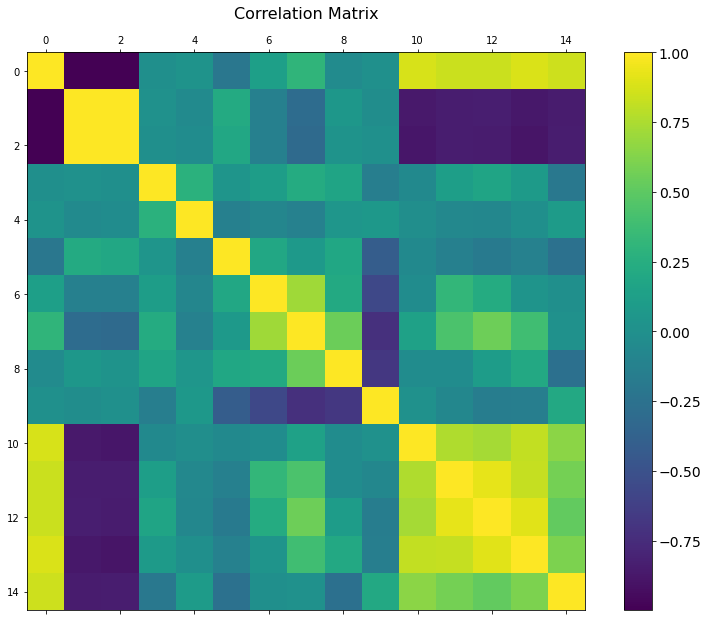

In [264]:
f = plt.figure(figsize=(14, 10))
plt.matshow(result.corr(), fignum=f.number)

cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);
plt.show()

## Correlation Matrix for Parkinsons Participants

In [283]:
 result = result[result["Group"] == 1]
 result.head()

,participant_id,Group,sess1_Med,sess2_Med,sex,age,rel_bp_delta_Cz_s01,rel_bp_tetha_Cz_s01,rel_bp_alpha_Cz_s01,rel_bp_beta_Cz_s01,rel_bp_gama_Cz_s01,rel_bp_delta_Cz_s02,rel_bp_tetha_Cz_s02,rel_bp_alpha_Cz_s02,rel_bp_beta_Cz_s02,rel_bp_gama_Cz_s02
1,sub-002,1,1.0,0,0,60,0.412203,0.115601,0.101370,0.126992,0.384096,0.293444,0.134775,0.122901,0.183026,0.322062
2,sub-003,1,0.0,1,1,75,0.162433,0.246097,0.158077,0.221605,0.321814,0.214383,0.316879,0.193108,0.210131,0.240782
3,sub-004,1,0.0,1,0,76,0.036183,0.028513,0.026589,0.079157,0.445105,0.313359,0.155954,0.145428,0.238119,0.323778
4,sub-005,1,1.0,0,1,75,0.275236,0.116899,0.068510,0.127009,0.442642,0.298485,0.136728,0.070761,0.106484,0.448128
5,sub-006,1,1.0,0,1,79,0.130054,0.125252,0.148008,0.391698,0.189245,0.147784,0.116841,0.142258,0.354640,0.249235


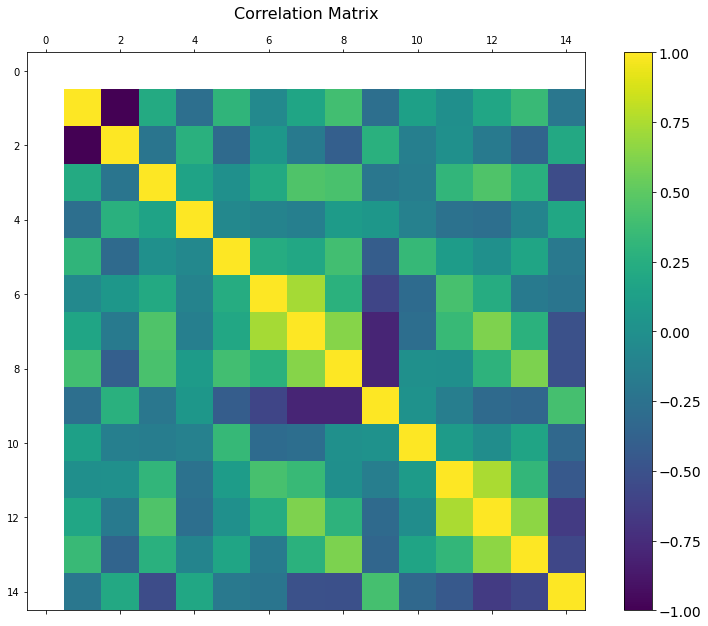

In [284]:
f = plt.figure(figsize=(14, 10))
plt.matshow(result.corr(), fignum=f.number)

cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);
plt.show()

# Import stats dataset

In [257]:
commom_path_ = "https://raw.githubusercontent.com/OptionalLanguor/datasci4health/dev/data/interim/"


participants_list = [[] for i in range(56)]

d = {0}

df_ = pd.DataFrame(d)
df_ = df_.fillna(0) # with 0s rather than NaNs

for sub in range(56):
  data_set_name = "sub-{0:03d}_ses-01_task-SimonConflict_eeg_stats.csv".format(sub + 1)

  url_participants = commom_path_ + data_set_name
  
  participants_list[sub].append(pd.read_csv(url_participants))

  data_set_name = "sub-{0:03d}_ses-02_task-SimonConflict_eeg_stats.csv".format(sub + 1)

  url_participants = commom_path_ + data_set_name
  try:
    participants_list[sub].append(pd.read_csv(url_participants))

  except:
    participants_list[sub].append(df_)

## Creating an empty dataset

In [285]:
df = {"Cz_mean_s1":[], "Cz_mean_s2":[], "Cz_std_s1":[], "Cz_std_s2":[], "Cz_min_s1":[], "Cz_min_s2":[], "Cz_max_s1":[], "Cz_max_s2":[], "Cz_25%_s1":[], "Cz_25%_s2":[], "Cz_50%_s1":[], "Cz_50%_s2":[], "Cz_75%_s1":[], "Cz_75%_s2":[]}

## Importing all data into new dataframe

In [286]:
index_count = 2
count = 0

while index_count < 9:
  my_index = 'Cz_' + participants_list[count][0].keys()[index_count] + '_s1'

  df[my_index].append(participants_list[count][0][participants_list[count][0].keys()[index_count]][24])
  
  my_index = 'Cz_' + participants_list[count][0].keys()[index_count] + '_s2'

  try:
    df[my_index].append(participants_list[count][1][participants_list[count][0].keys()[index_count]][24])
    
  except:
    df[my_index].append(0)

  count += 1

  if count == len(participants_list):
    index_count += 1
    count = 0



# Converting to dataframe

In [287]:
df_ = pd.DataFrame(data=df)
df_.head()

,Cz_mean_s1,Cz_mean_s2,Cz_std_s1,Cz_std_s2,Cz_min_s1,Cz_min_s2,Cz_max_s1,Cz_max_s2,Cz_25%_s1,Cz_25%_s2,Cz_50%_s1,Cz_50%_s2,Cz_75%_s1,Cz_75%_s2
0,9894.237877,0.000000,1078.875559,0.000000,7065.527344,0.000000,11240.820312,0.000000,9126.513672,0.000000,9952.490234,0.000000,10924.414062,0.000000
1,8346.863790,-2453.940964,276.718066,282.798644,7922.119141,-2839.013672,8968.115234,-1744.921875,8121.044922,-2693.945312,8258.935547,-2515.136719,8522.241211,-2206.933594
2,-14481.515522,-3447.259966,1607.247552,1045.362460,-16720.605469,-5597.363281,-10322.802734,-1678.955078,-15789.990234,-4059.130859,-14770.166016,-3563.281250,-13378.857422,-2524.560547
3,1440.392564,-4269.264026,342.704833,1063.426040,956.542969,-6137.060547,2069.384766,-2400.830078,1126.806641,-5268.505859,1435.156250,-4184.472656,1732.324219,-3409.667969
4,4287.420206,3260.026641,135.594173,473.846596,3862.841797,1439.355469,4485.498047,3773.925781,4199.365234,3155.078125,4321.386719,3340.039062,4391.455078,3615.722656


# Merge dataframes Stats with Participants

In [288]:
result = pd.concat([participants, df_], axis=1)
result.head()

,participant_id,Original_ID,Group,sess1_Med,sess2_Med,sex,age,Cz_mean_s1,Cz_mean_s2,Cz_std_s1,Cz_std_s2,Cz_min_s1,Cz_min_s2,Cz_max_s1,Cz_max_s2,Cz_25%_s1,Cz_25%_s2,Cz_50%_s1,Cz_50%_s2,Cz_75%_s1,Cz_75%_s2
0,sub-001,8010,0,9.0,99,0,61,9894.237877,0.000000,1078.875559,0.000000,7065.527344,0.000000,11240.820312,0.000000,9126.513672,0.000000,9952.490234,0.000000,10924.414062,0.000000
1,sub-002,801,1,1.0,0,0,60,8346.863790,-2453.940964,276.718066,282.798644,7922.119141,-2839.013672,8968.115234,-1744.921875,8121.044922,-2693.945312,8258.935547,-2515.136719,8522.241211,-2206.933594
2,sub-003,802,1,0.0,1,1,75,-14481.515522,-3447.259966,1607.247552,1045.362460,-16720.605469,-5597.363281,-10322.802734,-1678.955078,-15789.990234,-4059.130859,-14770.166016,-3563.281250,-13378.857422,-2524.560547
3,sub-004,803,1,0.0,1,0,76,1440.392564,-4269.264026,342.704833,1063.426040,956.542969,-6137.060547,2069.384766,-2400.830078,1126.806641,-5268.505859,1435.156250,-4184.472656,1732.324219,-3409.667969
4,sub-005,804,1,1.0,0,1,75,4287.420206,3260.026641,135.594173,473.846596,3862.841797,1439.355469,4485.498047,3773.925781,4199.365234,3155.078125,4321.386719,3340.039062,4391.455078,3615.722656


# Removing Original_ID Column

In [289]:
result = result.drop(['Original_ID'], axis=1)
result.head()

,participant_id,Group,sess1_Med,sess2_Med,sex,age,Cz_mean_s1,Cz_mean_s2,Cz_std_s1,Cz_std_s2,Cz_min_s1,Cz_min_s2,Cz_max_s1,Cz_max_s2,Cz_25%_s1,Cz_25%_s2,Cz_50%_s1,Cz_50%_s2,Cz_75%_s1,Cz_75%_s2
0,sub-001,0,9.0,99,0,61,9894.237877,0.000000,1078.875559,0.000000,7065.527344,0.000000,11240.820312,0.000000,9126.513672,0.000000,9952.490234,0.000000,10924.414062,0.000000
1,sub-002,1,1.0,0,0,60,8346.863790,-2453.940964,276.718066,282.798644,7922.119141,-2839.013672,8968.115234,-1744.921875,8121.044922,-2693.945312,8258.935547,-2515.136719,8522.241211,-2206.933594
2,sub-003,1,0.0,1,1,75,-14481.515522,-3447.259966,1607.247552,1045.362460,-16720.605469,-5597.363281,-10322.802734,-1678.955078,-15789.990234,-4059.130859,-14770.166016,-3563.281250,-13378.857422,-2524.560547
3,sub-004,1,0.0,1,0,76,1440.392564,-4269.264026,342.704833,1063.426040,956.542969,-6137.060547,2069.384766,-2400.830078,1126.806641,-5268.505859,1435.156250,-4184.472656,1732.324219,-3409.667969
4,sub-005,1,1.0,0,1,75,4287.420206,3260.026641,135.594173,473.846596,3862.841797,1439.355469,4485.498047,3773.925781,4199.365234,3155.078125,4321.386719,3340.039062,4391.455078,3615.722656


# Correlation

In [ ]:
result.corr()

,Group,sess1_Med,sess2_Med,sex,age,Cz_mean_s1,Cz_mean_s2,Cz_std_s1,Cz_std_s2,Cz_min_s1,Cz_min_s2,Cz_max_s1,Cz_max_s2,Cz_25%_s1,Cz_25%_s2,Cz_50%_s1,Cz_50%_s2,Cz_75%_s1,Cz_75%_s2
Group,1.000000e+00,-0.996558,-0.999974,-8.118755e-18,0.030575,0.017108,-0.046324,-0.127926,0.149850,0.049697,-0.133071,0.107370,0.155161,0.028996,0.080951,0.009418,0.132027,0.001979,0.175743
sess1_Med,-9.965576e-01,1.000000,0.995937,1.286038e-02,-0.045525,-0.005769,0.068134,0.124596,-0.165051,-0.040387,0.149546,-0.088583,-0.169015,-0.017304,-0.064242,0.001918,-0.115317,0.008813,-0.159639
sess2_Med,-9.999742e-01,0.995937,1.000000,-1.113584e-03,-0.029270,-0.018084,0.044420,0.128173,-0.148485,-0.050487,0.131602,-0.108962,-0.153912,-0.029999,-0.082372,-0.010397,-0.133432,-0.002913,-0.177081
sex,-8.118755e-18,0.012860,-0.001114,1.000000e+00,0.273818,0.121421,-0.000078,0.106950,0.111603,0.081572,-0.095944,-0.088769,0.125169,0.110087,0.165047,0.124252,0.174377,0.132099,0.184307
age,3.057489e-02,-0.045525,-0.029270,2.738180e-01,1.000000,0.121221,-0.100458,0.092323,0.131778,0.097280,-0.130134,0.118506,0.132029,0.111410,0.017755,0.118506,0.022401,0.128287,0.028259
Cz_mean_s1,1.710775e-02,-0.005769,-0.018084,1.214207e-01,0.121221,1.000000,0.084988,-0.047699,-0.017166,0.913283,0.027295,0.330508,-0.004071,0.996590,0.142640,0.999496,0.139581,0.996224,0.126617
Cz_mean_s2,-4.632398e-02,0.068134,0.044420,-7.771645e-05,-0.100458,0.084988,1.000000,0.114328,-0.843164,0.080986,0.886603,-0.030053,-0.794413,0.073096,0.537130,0.084038,0.516143,0.094878,0.501980
Cz_std_s1,-1.279262e-01,0.124596,0.128173,1.069501e-01,0.092323,-0.047699,0.114328,1.000000,-0.091406,-0.402644,0.096885,0.202348,-0.084783,-0.129071,0.074673,-0.033771,0.065687,0.037323,0.065433
Cz_std_s2,1.498502e-01,-0.165051,-0.148485,1.116026e-01,0.131778,-0.017166,-0.843164,-0.091406,1.000000,0.005817,-0.996203,-0.032759,0.996323,-0.008891,-0.002356,-0.016541,0.024888,-0.024132,0.041476
Cz_min_s1,4.969737e-02,-0.040387,-0.050487,8.157207e-02,0.097280,0.913283,0.080986,-0.402644,0.005817,1.000000,0.007126,0.131039,0.020872,0.939152,0.167413,0.906972,0.167229,0.879755,0.157039


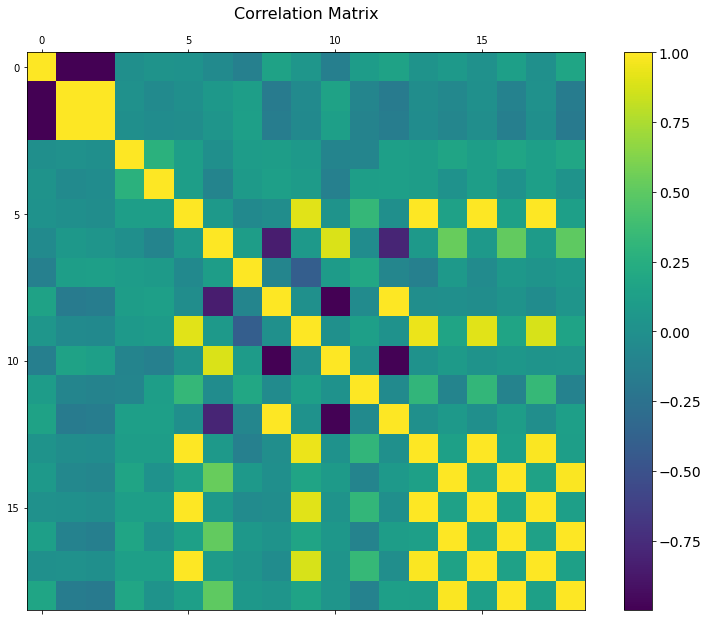

In [ ]:
f = plt.figure(figsize=(14, 10))
plt.matshow(result.corr(), fignum=f.number)

cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);
plt.show()

As maiores correlações observadas são entre os grupos: Group, sess1_Med, sess_Med.

A forte correlação é facilmente explicada pelo fato de haver uma forte correlação entre uma pessoa com doença de Parkinson  ou não, realizar duas sessões do teste. Dois testes são realizados, num deles os indivíduos sob efeito da medição, no outro não. Obviamente indivíduos sem doença de Parkinson não ingerem a medicação.

Não há nenhuma correção entre a idade, sexo com a presença da doença.

## Correlation Matrix for Parkinsons Participants

In [293]:
 result = result[result["Group"] == 1]
 result.head()

,participant_id,Group,sess1_Med,sess2_Med,sex,age,Cz_mean_s1,Cz_mean_s2,Cz_std_s1,Cz_std_s2,Cz_min_s1,Cz_min_s2,Cz_max_s1,Cz_max_s2,Cz_25%_s1,Cz_25%_s2,Cz_50%_s1,Cz_50%_s2,Cz_75%_s1,Cz_75%_s2
1,sub-002,1,1.0,0,0,60,8346.863790,-2453.940964,276.718066,282.798644,7922.119141,-2839.013672,8968.115234,-1744.921875,8121.044922,-2693.945312,8258.935547,-2515.136719,8522.241211,-2206.933594
2,sub-003,1,0.0,1,1,75,-14481.515522,-3447.259966,1607.247552,1045.362460,-16720.605469,-5597.363281,-10322.802734,-1678.955078,-15789.990234,-4059.130859,-14770.166016,-3563.281250,-13378.857422,-2524.560547
3,sub-004,1,0.0,1,0,76,1440.392564,-4269.264026,342.704833,1063.426040,956.542969,-6137.060547,2069.384766,-2400.830078,1126.806641,-5268.505859,1435.156250,-4184.472656,1732.324219,-3409.667969
4,sub-005,1,1.0,0,1,75,4287.420206,3260.026641,135.594173,473.846596,3862.841797,1439.355469,4485.498047,3773.925781,4199.365234,3155.078125,4321.386719,3340.039062,4391.455078,3615.722656
5,sub-006,1,1.0,0,1,79,7789.890484,18300.604615,1671.238422,994.449451,5334.716797,16215.087891,11499.072266,19844.433594,6337.304688,17609.667969,7547.705078,18326.562500,9036.279297,19186.914062


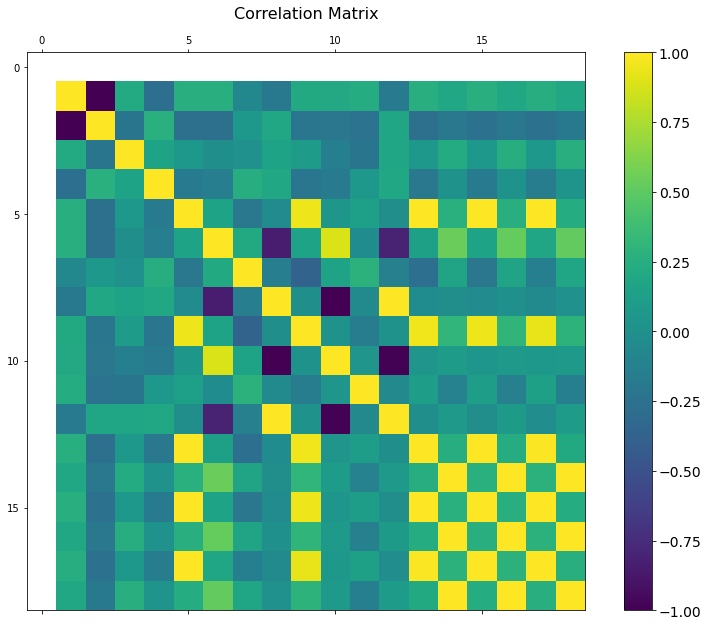

In [294]:
f = plt.figure(figsize=(14, 10))
plt.matshow(result.corr(), fignum=f.number)

cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);
plt.show()

# Statistics

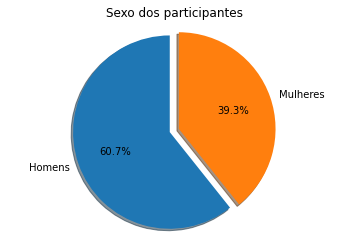

In [ ]:
females = participants[participants['sex'] == 0]
males = participants[participants['sex'] == 1]

total_participants = 56

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Homens', 'Mulheres'
sizes = [len(males), len(females)]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Sexo dos participantes')
plt.show()

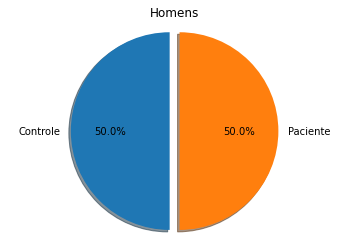

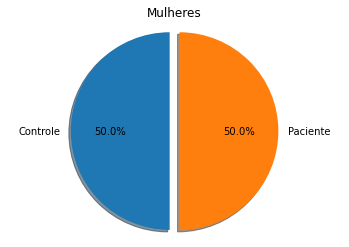

In [ ]:
females_control_group = females[females['Group'] == 0]
females_pacient_group = females[females['Group'] == 1]

males_control_group = males[males['Group'] == 0]
males_pacient_group = males[males['Group'] == 1]

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Controle', 'Paciente'
sizes = [len(males_control_group), len(males_pacient_group)]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Homens')
plt.show()

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Controle', 'Paciente'
sizes = [len(females_control_group), len(females_pacient_group)]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Mulheres')
plt.show()

In [ ]:
participants_mean_age = participants["age"].mean()
print("\nMédia de idade dos participantes: {:.2f} metros".format(participants_mean_age))

participants_std_age = participants["age"].std()
print("\nDesvio padrão da idade dos participantes: {:.2f}".format(participants_mean_age))

participants_sam_age = participants["age"].sem()
print("\nDesvio padrão das médias amostrais da idade dos participantes: {:.6f}".format(participants_sam_age))


Média de idade dos participantes: 69.48 metros

Desvio padrão da idade dos participantes: 69.48

Desvio padrão das médias amostrais da idade dos participantes: 1.181291


## Distribution of sex and age between Male and Female

In [ ]:
print("Total age distribution")
display(participants[['age']].describe().T)

print("Female age distribution:")
display(participants[participants['sex'] == 0][['age']].describe().T)

print("Male age distribution:")
display(participants[participants['sex'] == 1][['age']].describe().T)

Total age distribution


,count,mean,std,min,25%,50%,75%,max
age,56.0,69.482143,8.839973,48.0,64.0,70.0,75.25,84.0


Female age distribution:


,count,mean,std,min,25%,50%,75%,max
age,22.0,66.5,9.71376,48.0,61.75,66.5,73.75,83.0


Male age distribution:


,count,mean,std,min,25%,50%,75%,max
age,34.0,71.411765,7.773762,52.0,68.0,71.5,75.75,84.0


Boxplot for the three age distributions


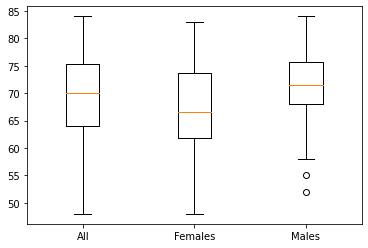

In [ ]:
print("Boxplot for the three age distributions")
plt.boxplot([participants['age'].values, females['age'].values, males['age'].values],
            labels=['All', 'Females', 'Males'])
plt.show()

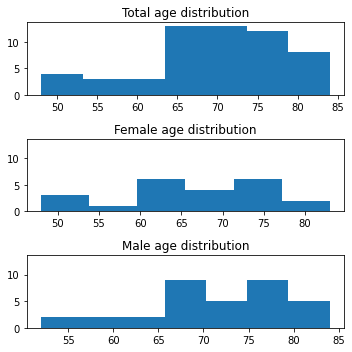

In [ ]:
fig, axs = plt.subplots(3, sharey=True, tight_layout=True, figsize=(5,5))
axs[0].hist(participants[['age']], bins='auto')
axs[0].set_title('Total age distribution')
axs[1].hist(females['age'], bins='auto')
axs[1].set_title('Female age distribution')
axs[2].hist(males['age'], bins='auto')
axs[2].set_title('Male age distribution')
plt.show()

# Participant #1
Number of sections: 1

In [ ]:
# Participant data
p01 = participants[participants['participant_id'] == 'sub-001']
p01.head()

,participant_id,Original_ID,Group,sess1_Med,sess2_Med,sex,age
0,sub-001,8010,0,NaN,no s2,0,61


# Participant #2
Number of sections: 2

In [ ]:
# Participant data
p02 = participants[participants['participant_id'] == 'sub-002']
p02.head()

,participant_id,Original_ID,Group,sess1_Med,sess2_Med,sex,age
1,sub-002,801,1,ON,OFF,0,60


# Participant #3
Number of sections: 2

In [ ]:
# Participant data
p03 = participants[participants['participant_id'] == 'sub-003']
p03.head()

,participant_id,Original_ID,Group,sess1_Med,sess2_Med,sex,age
2,sub-003,802,1,OFF,ON,1,75


# Participant #4
Number of sections: 2

In [ ]:
# Participant data
p04 = participants[participants['participant_id'] == 'sub-004']
p04.head()

,participant_id,Original_ID,Group,sess1_Med,sess2_Med,sex,age
3,sub-004,803,1,OFF,ON,0,76


# Participant #5
Number of sections: 2

In [ ]:
# Participant data
p05 = participants[participants['participant_id'] == 'sub-005']
p05.head()

,participant_id,Original_ID,Group,sess1_Med,sess2_Med,sex,age
4,sub-005,804,1,ON,OFF,1,75


# Participant #6
Number of sections: 2

In [ ]:
# Participant data
p06 = participants[participants['participant_id'] == 'sub-006']
p06.head()

,participant_id,Original_ID,Group,sess1_Med,sess2_Med,sex,age
5,sub-006,805,1,ON,OFF,1,79


# Participant #7
Number of sections: 1

In [ ]:
# Participant data
p07 = participants[participants['participant_id'] == 'sub-007']
p07.head()

,participant_id,Original_ID,Group,sess1_Med,sess2_Med,sex,age
6,sub-007,8060,0,NaN,no s2,0,83


# Participant #8
Number of sections: 2

In [ ]:
# Participant data
p08 = participants[participants['participant_id'] == 'sub-008']
p08.head()

,participant_id,Original_ID,Group,sess1_Med,sess2_Med,sex,age
7,sub-008,806,1,OFF,ON,0,79


# Participant #9
Number of sections: 1

In [ ]:
# Participant data
p09 = participants[participants['participant_id'] == 'sub-009']
p09.head()

,participant_id,Original_ID,Group,sess1_Med,sess2_Med,sex,age
8,sub-009,8070,0,NaN,no s2,0,67


# Participant #10
Number of sections: 2

In [ ]:
# Participant data
p10 = participants[participants['participant_id'] == 'sub-010']
p10.head()

,participant_id,Original_ID,Group,sess1_Med,sess2_Med,sex,age
9,sub-010,807,1,OFF,ON,0,72


# Participant #11
Number of sections:2

In [ ]:
# Participant data
p11 = participants[participants['participant_id'] == 'sub-011']
p11.head()

,participant_id,Original_ID,Group,sess1_Med,sess2_Med,sex,age
10,sub-011,808,1,OFF,ON,1,68


In [ ]:
# Participant data
p12 = participants[participants['participant_id'] == 'sub-012']
p12.head()

,participant_id,Original_ID,Group,sess1_Med,sess2_Med,sex,age
11,sub-012,809,1,ON,OFF,1,71


# Participant #13
Number of sections: 2

In [ ]:
# Participant data
p13 = participants[participants['participant_id'] == 'sub-013']
p13.head()

,participant_id,Original_ID,Group,sess1_Med,sess2_Med,sex,age
12,sub-013,810,1,ON,OFF,1,68


# Participant #14
Number of sections: 2

In [ ]:
# Participant data
p14 = participants[participants['participant_id'] == 'sub-014']
p14.head()

,participant_id,Original_ID,Group,sess1_Med,sess2_Med,sex,age
13,sub-014,811,1,ON,OFF,1,68


# Participant #15
Number of sections: 2

In [ ]:
# Participant data
p15 = participants[participants['participant_id'] == 'sub-015']
p15.head()

,participant_id,Original_ID,Group,sess1_Med,sess2_Med,sex,age
14,sub-015,813,1,OFF,ON,1,83


# Participant #16
Number of sections: 2

In [ ]:
# Participant data
p16 = participants[participants['participant_id'] == 'sub-016']
p16.head()

,participant_id,Original_ID,Group,sess1_Med,sess2_Med,sex,age
15,sub-016,814,1,ON,OFF,1,61


# Participant #17
Number of sections: 2

In [ ]:
# Participant data
p17 = participants[participants['participant_id'] == 'sub-017']
p17.head()

,participant_id,Original_ID,Group,sess1_Med,sess2_Med,sex,age
16,sub-017,815,1,ON,OFF,1,55


# Participant #18
Number of sections: 2

In [ ]:
# Participant data
p18 = participants[participants['participant_id'] == 'sub-018']
p18.head()

,participant_id,Original_ID,Group,sess1_Med,sess2_Med,sex,age
17,sub-018,816,1,OFF,ON,0,49


# Participant #19
Number of sections: 2

In [ ]:
# Participant data
p19 = participants[participants['participant_id'] == 'sub-019']
p19.head()

,participant_id,Original_ID,Group,sess1_Med,sess2_Med,sex,age
18,sub-019,817,1,OFF,ON,1,71


# Participant #20
Number of sections: 2

In [ ]:
# Participant data
p20 = participants[participants['participant_id'] == 'sub-020']
p20.head()

,participant_id,Original_ID,Group,sess1_Med,sess2_Med,sex,age
19,sub-020,818,1,ON,OFF,0,74


# Participant #21
Number of sections: 2

In [ ]:
# Participant data
p21 = participants[participants['participant_id'] == 'sub-021']
p21.head()

,participant_id,Original_ID,Group,sess1_Med,sess2_Med,sex,age
20,sub-021,819,1,OFF,ON,1,76


# Participant #22
Number of sections: 2

In [ ]:
# Participant data
p22 = participants[participants['participant_id'] == 'sub-022']
p22.head()

,participant_id,Original_ID,Group,sess1_Med,sess2_Med,sex,age
21,sub-022,820,1,ON,OFF,1,72


# Participant #23
Number of sections: 2

In [ ]:
# Participant data
p23 = participants[participants['participant_id'] == 'sub-023']
p23.head()

,participant_id,Original_ID,Group,sess1_Med,sess2_Med,sex,age
22,sub-023,821,1,ON,OFF,0,49


# Participant #24
Number of sections: 2

In [ ]:
# Participant data
p24 = participants[participants['participant_id'] == 'sub-024']
p24.head()

,participant_id,Original_ID,Group,sess1_Med,sess2_Med,sex,age
23,sub-024,822,1,ON,OFF,1,70


# Participant #25
Number of sections: 2

In [ ]:
# Participant data
p25 = participants[participants['participant_id'] == 'sub-025']
p25.head()

,participant_id,Original_ID,Group,sess1_Med,sess2_Med,sex,age
24,sub-025,823,1,OFF,ON,0,64


# Participant #26
Number of sections: 2

In [ ]:
# Participant data
p26 = participants[participants['participant_id'] == 'sub-026']
p26.head()

,participant_id,Original_ID,Group,sess1_Med,sess2_Med,sex,age
25,sub-026,824,1,OFF,ON,1,78


# Participant #27
Number of sections: 2

In [ ]:
# Participant data
p27 = participants[participants['participant_id'] == 'sub-027']
p27.head()

,participant_id,Original_ID,Group,sess1_Med,sess2_Med,sex,age
26,sub-027,825,1,ON,OFF,0,77


# Participant #28
Number of sections: 2

In [ ]:
# Participant data
p28 = participants[participants['participant_id'] == 'sub-028']
p28.head()

,participant_id,Original_ID,Group,sess1_Med,sess2_Med,sex,age
27,sub-028,826,1,ON,OFF,1,66


# Participant #29
Number of sections: 2

In [ ]:
# Participant data
p29 = participants[participants['participant_id'] == 'sub-029']
p29.head()

,participant_id,Original_ID,Group,sess1_Med,sess2_Med,sex,age
28,sub-029,827,1,OFF,ON,1,68


# Participant #30
Number of sections: 2

In [ ]:
# Participant data
p30 = participants[participants['participant_id'] == 'sub-030']
p30.head()

,participant_id,Original_ID,Group,sess1_Med,sess2_Med,sex,age
29,sub-030,828,1,OFF,ON,0,76


# Participant #31
Number of sections: 2

In [ ]:
# Participant data
p31 = participants[participants['participant_id'] == 'sub-031']
p31.head()

,participant_id,Original_ID,Group,sess1_Med,sess2_Med,sex,age
30,sub-031,829,1,OFF,ON,0,73


# Participant #32
Number of sections: 1

In [ ]:
# Participant data
p32 = participants[participants['participant_id'] == 'sub-032']
p32.head()

,participant_id,Original_ID,Group,sess1_Med,sess2_Med,sex,age
31,sub-032,890,0,NaN,no s2,0,66


# Participant #33
Number of sections: 1

In [ ]:
# Participant data
p33 = participants[participants['participant_id'] == 'sub-033']
p33.head()

,participant_id,Original_ID,Group,sess1_Med,sess2_Med,sex,age
32,sub-033,891,0,NaN,no s2,1,80


# Participant #34
Number of sections: 1

In [ ]:
# Participant data
p34 = participants[participants['participant_id'] == 'sub-034']
p34.head()

,participant_id,Original_ID,Group,sess1_Med,sess2_Med,sex,age
33,sub-034,892,0,NaN,no s2,0,64


# Participant #35
Number of sections: 1

In [ ]:
# Participant data
p35 = participants[participants['participant_id'] == 'sub-035']
p35.head()

,participant_id,Original_ID,Group,sess1_Med,sess2_Med,sex,age
34,sub-035,893,0,NaN,no s2,0,64


# Participant #36
Number of sections: 1

In [ ]:
# Participant data
p36 = participants[participants['participant_id'] == 'sub-036']
p36.head()

,participant_id,Original_ID,Group,sess1_Med,sess2_Med,sex,age
35,sub-036,894,0,NaN,no s2,0,69


# Participant #37
Number of sections: 1

In [ ]:
# Participant data
p37 = participants[participants['participant_id'] == 'sub-037']
p37.head()

,participant_id,Original_ID,Group,sess1_Med,sess2_Med,sex,age
36,sub-037,895,0,NaN,no s2,1,69


# Participant #38
Number of sections: 1

In [ ]:
# Participant data
p38 = participants[participants['participant_id'] == 'sub-038']
p38.head()

,participant_id,Original_ID,Group,sess1_Med,sess2_Med,sex,age
37,sub-038,896,0,NaN,no s2,1,58


# Participant #39
Number of sections: 1

In [ ]:
# Participant data
p39 = participants[participants['participant_id'] == 'sub-039']
p39.head()

,participant_id,Original_ID,Group,sess1_Med,sess2_Med,sex,age
38,sub-039,897,0,NaN,no s2,1,70


# Participant #40
Number of sections: 1

In [ ]:
# Participant data
p40 = participants[participants['participant_id'] == 'sub-040']
p40.head()

,participant_id,Original_ID,Group,sess1_Med,sess2_Med,sex,age
39,sub-040,898,0,NaN,no s2,1,64


# Participant #41
Number of sections: 1

In [ ]:
# Participant data
p41 = participants[participants['participant_id'] == 'sub-041']
p41.head()

,participant_id,Original_ID,Group,sess1_Med,sess2_Med,sex,age
40,sub-041,899,0,NaN,no s2,1,52


# Participant #42
Number of sections: 1

In [ ]:
# Participant data
p42 = participants[participants['participant_id'] == 'sub-042']
p42.head()

,participant_id,Original_ID,Group,sess1_Med,sess2_Med,sex,age
41,sub-042,900,0,NaN,no s2,1,84


# Participant #43
Number of sections: 1

In [ ]:
# Participant data
p43 = participants[participants['participant_id'] == 'sub-043']
p43.head()

,participant_id,Original_ID,Group,sess1_Med,sess2_Med,sex,age
42,sub-043,901,0,NaN,no s2,0,69


# Participant #44
Number of sections: 1

In [ ]:
# Participant data
p44 = participants[participants['participant_id'] == 'sub-044']
p44.head()

,participant_id,Original_ID,Group,sess1_Med,sess2_Med,sex,age
43,sub-044,902,0,NaN,no s2,1,83


# Participant #45
Number of sections: 1

In [ ]:
# Participant data
p45 = participants[participants['participant_id'] == 'sub-045']
p45.head()

,participant_id,Original_ID,Group,sess1_Med,sess2_Med,sex,age
44,sub-045,903,0,NaN,no s2,1,83


# Participant #46
Number of sections: 1

,participant_id,Original_ID,Group,sess1_Med,sess2_Med,sex,age
45,sub-046,904,0,NaN,no s2,1,73


# Participant #47
Number of sections: 1

,participant_id,Original_ID,Group,sess1_Med,sess2_Med,sex,age
46,sub-047,905,0,NaN,no s2,0,58


# Participant #48
Number of sections: 1

In [ ]:
# Participant data
p48 = participants[participants['participant_id'] == 'sub-048']
p48.head()

,participant_id,Original_ID,Group,sess1_Med,sess2_Med,sex,age
47,sub-048,906,0,NaN,no s2,1,77


# Participant #49
Number of sections: 1

In [ ]:
# Participant data
p49 = participants[participants['participant_id'] == 'sub-049']
p49.head()

,participant_id,Original_ID,Group,sess1_Med,sess2_Med,sex,age
48,sub-049,907,0,NaN,no s2,0,65


# Participant #50
Number of sections: 1

In [ ]:
# Participant data
p50 = participants[participants['participant_id'] == 'sub-050']
p50.head()

,participant_id,Original_ID,Group,sess1_Med,sess2_Med,sex,age
49,sub-050,908,0,NaN,no s2,1,75


# Participant #51
Number of sections: 1

In [ ]:
# Participant data
p51 = participants[participants['participant_id'] == 'sub-051']
p51.head()

,participant_id,Original_ID,Group,sess1_Med,sess2_Med,sex,age
50,sub-051,909,0,NaN,no s2,1,64


# Participant #52
Number of sections: 1

In [ ]:
# Participant data
p52 = participants[participants['participant_id'] == 'sub-052']
p52.head()

,participant_id,Original_ID,Group,sess1_Med,sess2_Med,sex,age
51,sub-052,910,0,NaN,no s2,1,75


# Participant #53
Number of sections: 1

In [ ]:
# Participant data
p53 = participants[participants['participant_id'] == 'sub-053']
p53.head()

,participant_id,Original_ID,Group,sess1_Med,sess2_Med,sex,age
52,sub-053,911,0,NaN,no s2,1,73


# Participant #54
Number of sections: 1

In [ ]:
# Participant data
p54 = participants[participants['participant_id'] == 'sub-054']
p54.head()

,participant_id,Original_ID,Group,sess1_Med,sess2_Med,sex,age
53,sub-054,912,0,NaN,no s2,1,75


# Participant #55
Number of sections: 1

In [ ]:
# Participant data
p55 = participants[participants['participant_id'] == 'sub-055']
p55.head()

,participant_id,Original_ID,Group,sess1_Med,sess2_Med,sex,age
54,sub-055,913,0,NaN,no s2,1,69


# Participant #56
Number of sections: 1

In [ ]:
# Participant data
p56 = participants[participants['participant_id'] == 'sub-056']
p56.head()

,participant_id,Original_ID,Group,sess1_Med,sess2_Med,sex,age
55,sub-056,914,0,NaN,no s2,0,48
